In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1./255, #Remember, Neural Networks generally like it when inputs are between 0 and 1
      rotation_range=40, #Augmenting the image by rotating it +- 40 degrees
      width_shift_range=0.2, #Augmenting it by stretching horizontally
      height_shift_range=0.2, #Augmenting it by stretching vertically
      shear_range=0.2, #Agumenting by "italicizing" image
      zoom_range=0.2, #Augmenting by zooming in random parts
      horizontal_flip=True, #Augmenting by flipping image
      fill_mode='nearest' #Sometimes, when augmenting an image there can be blank spots; How can you fill them
);

train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Kaggle/Simpsons/reduced_dataset",
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='categorical')

Found 13495 images belonging to 23 classes.


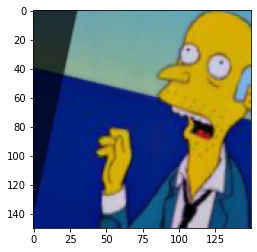

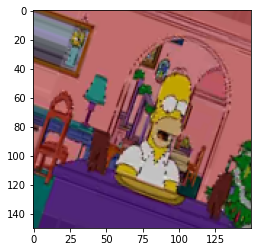

In [ ]:
for _ in range(2):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(train_generator.num_classes, activation="softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(train_generator, epochs=100)

Epoch 1/100
